## hw1

1. Вычислить $\sqrt[k] a $

    * С помощью метода бисекции.
    * C помощью метода Ньютона.

1. С помощью метода бисекции.

In [1]:
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (8, 8)

In [2]:
k = 10

a = 1024

def f(x):
    return x**k - a

def bisection(g, a, b, num_iters=10):
    states = []
    left = a
    right = b
    for i in range(num_iters):
        mid = (left + right) / 2
        if g(left) * g(mid) < 0:
            right = mid
        else:
            left = mid
        states.append(right)
    return states[-1], states

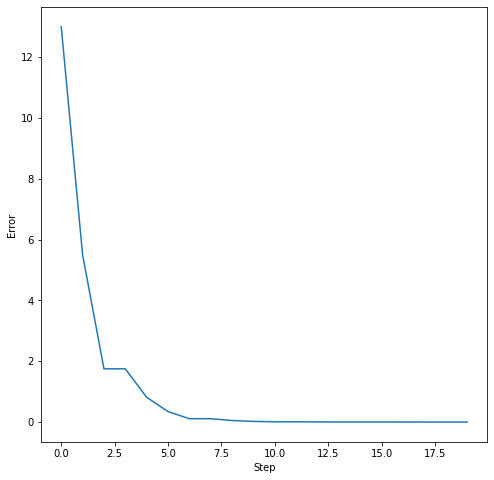

In [3]:
root, estimates = bisection(f, 1e-100, 30, 20)
plt.plot([i for i in range(len(estimates))], [x - a ** (1/float(k)) for x in estimates])
plt.xlabel('Step')
plt.ylabel('Error')
plt.show()

2. C помощью метода Ньютона.

возьмем последовательность $x_{n + 1} = \frac{1}{k}((k - 1)\cdot x_n + \frac{a}{x_n^{k -1}})$
ee производная в $x = \sqrt[k] a$ равна 0 и $x_k$ возрастает на $(0, \sqrt[k] a)$ и убывает на $(\sqrt[k] a, +\infty)$ т.е сходится к $\sqrt[k] a$ при $x_0 > 0$ + функция непрерывна на $(0, +\infty)$ а значит непрерывна по Липшицу на любом замкнутом отрезке т.е с какого-то момента будет квадратичная сходимость

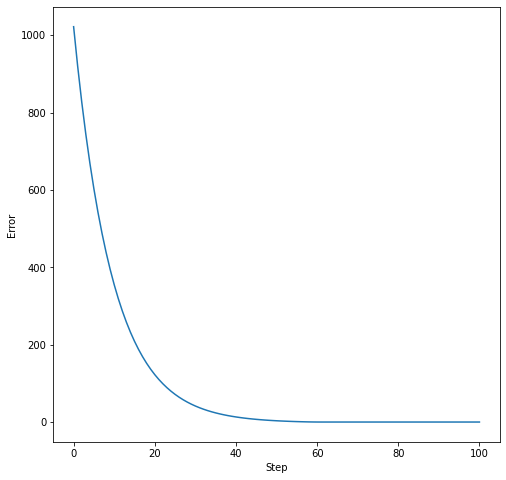

In [4]:
def newton_sqrt(a, iters=10):
    sequence = [a]
    for i in range(iters):
        sequence.append((1/float(k)) * ((k - 1) * sequence[-1] + a / (sequence[-1] ** (k - 1))))
    return sequence[-1], sequence

root, estimates = newton_sqrt(a, 100)
plt.plot([i for i in range(len(estimates))], [x - a ** (1/float(k)) for x in estimates])
plt.xlabel('Step')
plt.ylabel('Error')
plt.show()

2. Дан многочлен P степени не больше 5 и отрезок [L; R], пара.
 * Локализоватькорни P,т.е. найти не пересекающиеся отрезки $[L_1;R_1],...,[L_m;R_m]$ такие, что $P(L_i) \cdot P(R_i) < 0$.
 * Для каждого $[L_i; R_i]$ найти соответствующий корень. 
 * Найти глобальный минимум P на отрезке [L; R].

1 + 2

In [5]:
# многочлен записан как коэф в обратном порядке, т.е p[0] - n'ый коэф, если многочлен нулевой то он должен быть записан как [0]

L = -10
R = 10

def getFuncFromPoly(p):
    return (lambda x: sum([(k * (x ** (len(p) - 1 - i))) for i,k in enumerate(p)]))

def check(p, l, r):
    g = getFuncFromPoly(p)
    return (g(l) * g(r)) <= 0

def getRootIntervals(p):
    if (len(p) == 1):
        return []
    elif (len(p) == 2):
        return [(-p[1]/p[0]) - 1, (-p[1]/p[0]) + 1]
    
    d = p[:-1].copy()
    for i in range(len(d)):
        indx = len(p) - 1 - i
        d[i] *= indx
    roots = getRoots(d)
    ans = list()
    if check(p, L, roots[0]):
        ans.append((L, roots[0]))
    for i in range(len(roots) - 1):
        if check(p, roots[i], roots[i + 1]):
            ans.append((roots[i], roots[i + 1]))
    if check(p, roots[-1], R):
        ans.append((roots[-1], R))
    return ans
    
def getRoots(p):
    if (len(p) == 1):
        return []
    elif (len(p) == 2):
        return [-1 * p[1]/p[0]]
    
    roots = []
    intervals = getRootIntervals(p)
    for i,(l,r) in enumerate(intervals):
        g = getFuncFromPoly(p)
        if (i == len(intervals) and g(r) == 0):
            roots.append(r)
        elif (i != len(intervals) and g(l)) == 0:
            roots.append(l)
        else:
            root, _ = bisection(getFuncFromPoly(p), l, r, 20)
            roots.append(root)
    return roots

In [6]:
print(getRoots([1,1,-1]), getRoots([1,1,1]), getRoots([1,-2,1]))

[-1.6180286407470703, 0.6180362701416016] [] [1.0, 1.0]


3

In [7]:
def findMax(p):
    d = p[:-1].copy()
    for i in range(len(d)):
        indx = len(p) - 1 - i
        d[i] *= indx
    roots = getRoots(d)
    vals = map(getFuncFromPoly(p), roots + [L, R])
    return max(vals)

In [8]:
findMax([1,1,-1])

109

3. При $a,b,c > 0$ найти минимум функции $e^{ax} +e^{−bx} +c\cdot (x−d)^2$
    * С использованием метода бисекции. 
    * C использованием метода Ньютона. 
    * С использованием тернарного поиска.

1. С использованием метода бисекции.

In [9]:
import math

a = 1
b = 1
c = 1
d = 1
def h(x):
    return a * math.exp(a * x) - b * math.exp(-1 * b * x) + c * 2 * (x - d)

tmp = (math.log(b) - math.log(a))/(a + b)

l = min(d, tmp) - 10
r = max(d, tmp) + 10

root, _ = bisection(h, l, r, 20)
root

0.49008655548095703

2. C использованием метода Ньютона.

In [10]:
def j(x):
    f = a * math.exp(a * x) - b * math.exp(-1 * b * x) + c * 2 * (x - d)
    ff = a * a * math.exp(a * x) + b * b * math.exp(-1 * b * x) + c * 2
    return x - (f/ff)

def newton_sqrt(a, iters=10):
    sequence = [a]
    for i in range(iters):
        sequence.append(j(sequence[-1]))
    return sequence[-1], sequence

root, _ = newton_sqrt(a, 100)
root

0.4900730684805478

3. С использованием тернарного поиска.

In [11]:
def ff(x):
    return math.exp(a * x) + math.exp(-1 * b * x) + c * ((x - d) ** 2)

def trisection(g, a, b, num_iters=10):
    states = [(a, b)]
    left = a
    right = b
    for i in range(num_iters):
        gamma = (2 * left + right) / 3
        delta = (left + 2 * right) / 3
        if g(gamma) < g(delta):
            right = delta
        else:
            left = gamma
        states.append((left, right))
    return states

In [12]:
trisection(ff, l, r, 25)[-1]

(0.48945210223541785, 0.49028374692430754)